# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

In [18]:
# Initialed imports

import os

import pandas as pd

from dotenv import load_dotenv

import nltk as nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Read your api key environment variable

load_dotenv(".env")

api_key = os.getenv("news_akey")

In [20]:
# Created a newsapi client

from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)


In [21]:
# Fetched the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(q = "bitcoin", language = "en")

In [22]:
# Fetched the Ethereum news articles

ethereum_headlines = newsapi.get_everything(q = "ethereum", language = "en")

In [23]:
# Created definition for News

def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [24]:
# Created df with headlines

bitcoin_df = create_df(bitcoin_headlines["articles"])

ethereum_df = create_df(ethereum_headlines["articles"])

In [25]:
# Created definition for sent score

def build_sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": []
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": []
    }

    # Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            
            if(row["text"] != None):
                text_sentiment = analyzer.polarity_scores(row["text"])
                text_sent["text_compound"].append(text_sentiment["compound"])
                text_sent["text_pos"].append(text_sentiment["pos"])
                text_sent["text_neu"].append(text_sentiment["neu"])
                text_sent["text_neg"].append(text_sentiment["neg"])
            else:
                text_sent["text_compound"].append(0)
                text_sent["text_pos"].append(0)
                text_sent["text_neu"].append(0)
                text_sent["text_neg"].append(0)
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    new_df = df.join(title_sentiment_df).join(text_sentiment_df)

    return new_df

In [26]:
# Created the Bitcoin sentiment scores DataFrame

bitcoin_sent = build_sent_score(bitcoin_df)

bitcoin_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.0000,0.000,1.000,0.000,0.6908,0.178,0.822,0.000
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.8126,0.000,0.517,0.483,-0.5719,0.111,0.705,0.184
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,0.3182,0.247,0.753,0.000,-0.6124,0.000,0.857,0.143
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.0000,0.000,1.000,0.000,0.6240,0.127,0.873,0.000
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,1.000,0.000,0.7264,0.164,0.836,0.000


In [27]:
# Created the Ethereum sentiment scores DataFrame

ethereum_sent = build_sent_score(ethereum_df)

ethereum_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,0.4703,0.253,0.747,0.000,0.3612,0.075,0.925,0.000
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,0.6705,0.379,0.621,0.000,-0.2411,0.000,0.939,0.061
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,1.000,0.000,0.7264,0.164,0.836,0.000
3,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.0000,0.000,1.000,0.000,0.6956,0.190,0.810,0.000
4,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,-0.2960,0.000,0.761,0.239,0.0000,0.000,1.000,0.000


In [28]:
# Described the Bitcoin Sentiment

bitcoin_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.057905,0.045750,0.875750,0.078500,-0.008310,0.060000,0.880250,0.059750
std,0.263197,0.099279,0.175543,0.135392,0.493498,0.060037,0.101662,0.090311
min,-0.812600,0.000000,0.458000,0.000000,-0.827100,0.000000,0.653000,0.000000
25%,-0.056575,0.000000,0.760500,0.000000,-0.405525,0.000000,0.836000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.056000,0.891000,0.000000
75%,0.000000,0.000000,1.000000,0.194750,0.445000,0.096000,0.940000,0.088250
max,0.433600,0.328000,1.000000,0.483000,0.726400,0.178000,1.000000,0.287000


In [29]:
# Described the Ethereum Sentiment

ethereum_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.00000
mean,0.115095,0.083150,0.88895,0.027900,0.244345,0.073250,0.91330,0.01345
std,0.254059,0.119263,0.11977,0.070747,0.344475,0.079278,0.08322,0.02766
min,-0.296000,0.000000,0.62100,0.000000,-0.340000,0.000000,0.78200,0.00000
25%,0.000000,0.000000,0.79700,0.000000,0.000000,0.000000,0.84050,0.00000
50%,0.000000,0.000000,0.90900,0.000000,0.125000,0.037500,0.92650,0.00000
75%,0.270200,0.178250,1.00000,0.000000,0.557175,0.151750,1.00000,0.00000
max,0.670500,0.379000,1.00000,0.239000,0.771700,0.194000,1.00000,0.07200


### Questions:

Q: Which coin had the highest mean positive score?

A: Based on headlines (titles), Bitcoin has the highest mean positive sentiment score (0.086 vs 0.051). On the other hand, the body text states that Ethereum has the higher mean positive score (0.064 vs 0.053).

Q: Which coin had the highest compound score?

A: Based on headlines, Bitcoin has the highest mean compound score (-0.042 vs -0.07). Howeverm  Ethereum has the highest mean compound score (0.143 vs 0.135) based on the body.

Q. Which coin had the highest positive score?

A: Based on both headlines Bitcoin(0.097) vs Ehtereum(0.075) and body Bitcoin(0.032) vs Ehtereum(0.021). Overall,  Ethereum has the highest mean negative score.

---

## 2. Natural Language Processing
---
###   Tokenizer


In [30]:
# Initialized Library 

from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer, PorterStemmer

from string import punctuation

import nltk
nltk.download('punkt')
nltk.download('wordnet')

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# Instantiated the lemmatizer

lemmatizer = WordNetLemmatizer()

# Created a list of stopwords

sw = set(stopwords.words('english'))

# Expanded the default stopwords list if necessary

sw_addons = {"reuters", "ha", "stafffile", "photo", "poster", "pr", "cnw", "one", "according"}

In [37]:
# Completed the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Removed the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Created a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatized words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Converted the words to lowercase and removed the stop words
    
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return output

In [38]:
# Created a definition for tokens

def build_tokens(df):
    tokens = {
        "tokens": []
    }
    
    # Get sentiment for the text 
    for index, row in df.iterrows():
        try:            
            if(row["text"] != None):
                tokens["tokens"].append(tokenizer(row["text"]))
            else:
                tokens["tokens"].append("")
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    tokens_df = pd.DataFrame(tokens)
    new_df = df.join(tokens_df)

    return new_df


In [39]:
# Created a new tokens column for Bitcoin

bitcoin_token_df = build_tokens(bitcoin_sent)

bitcoin_token_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,0.0000,0.000,1.000,0.000,0.6908,0.178,0.822,0.000,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.8126,0.000,0.517,0.483,-0.5719,0.111,0.705,0.184,"[filed, underthe, supply, chain, attack, reach..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,0.3182,0.247,0.753,0.000,-0.6124,0.000,0.857,0.143,"[image, copyrightgetty, imagesthe, gang, behin..."
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,0.0000,0.000,1.000,0.000,0.6240,0.127,0.873,0.000,"[get, roundup, techcrunchs, biggest, important..."
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,1.000,0.000,0.7264,0.164,0.836,0.000,"[retail, investor, grew, comfortable, buying, ..."


In [40]:
# Created a new tokens column for Ethereum

ethereum_token_df = build_tokens(ethereum_sent)

ethereum_token_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,0.4703,0.253,0.747,0.000,0.3612,0.075,0.925,0.000,"[many, blockchain, platform, competing, invest..."
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,0.6705,0.379,0.621,0.000,-0.2411,0.000,0.939,0.061,"[blockchain, infrastructure, startup, heating,..."
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,0.0000,0.000,1.000,0.000,0.7264,0.164,0.836,0.000,"[retail, investor, grew, comfortable, buying, ..."
3,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,0.0000,0.000,1.000,0.000,0.6956,0.190,0.810,0.000,"[cent, wa, founded, adfree, creator, network, ..."
4,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,-0.2960,0.000,0.761,0.239,0.0000,0.000,1.000,0.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In [41]:
# Imported library 

from collections import Counter

from nltk import ngrams

In [42]:
# Created definition bigram_counter

def bigram_counter(doc): 
    processed = tokenizer(doc)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])

In [43]:
# Generated the Bitcoin N-grams where N=2

bitcoin_str = str(list(bitcoin_token_df["tokens"]))

bigram_counter(bitcoin_str)

,bigram,count
0,"(illustration, taken)",5
1,"(char, representation)",4
2,"(july, bitcoin)",3
3,"(representation, virtual)",3
4,"(virtual, currency)",3
5,"(currency, bitcoin)",3
6,"(bitcoin, seen)",3
7,"(seen, front)",3
8,"(char, image)",2
9,"(ransomware, attack)",2


In [44]:
# Generated the Ethereum N-grams where N=2

ethereum_str = str(list(ethereum_token_df["tokens"]))

bigram_counter(ethereum_str)

,bigram,count
0,"(cryptocurrency, ethereum)",4
1,"(bitcoin, ethereum)",3
2,"(char, representation)",3
3,"(pc, motherboard)",3
4,"(ethereum, network)",3
5,"(reutersdado, ruvicillustrationnew)",2
6,"(ruvicillustrationnew, york)",2
7,"(cryptocurrencies, bitcoin)",2
8,"(ethereum, placed)",2
9,"(placed, pc)",2


In [46]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    
    return Counter(tokens).most_common(N)

In [47]:
# Used token_count to get the top 10 words for Bitcoin

bitcoin_processed = tokenizer(bitcoin_str)

print(dict(token_count(bitcoin_processed, 10)))

{'char': 19, 'bitcoin': 11, 'attack': 7, 'reutersdado': 6, 'july': 5, 'illustration': 5, 'taken': 5, 'ransomware': 4, 'representation': 4, 'seen': 4}


In [48]:
# Used token_count to get the top 10 words for Ethereum

ethereum_processed = tokenizer(ethereum_str)

print(dict(token_count(ethereum_processed, 10)))

{'char': 20, 'ethereum': 17, 'network': 5, 'cryptocurrency': 5, 'blockchain': 4, 'platform': 4, 'like': 4, 'cryptocurrencies': 4, 'bitcoin': 3, 'world': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [50]:
# Imported library 

from wordcloud import WordCloud

import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [20.0, 10.0]

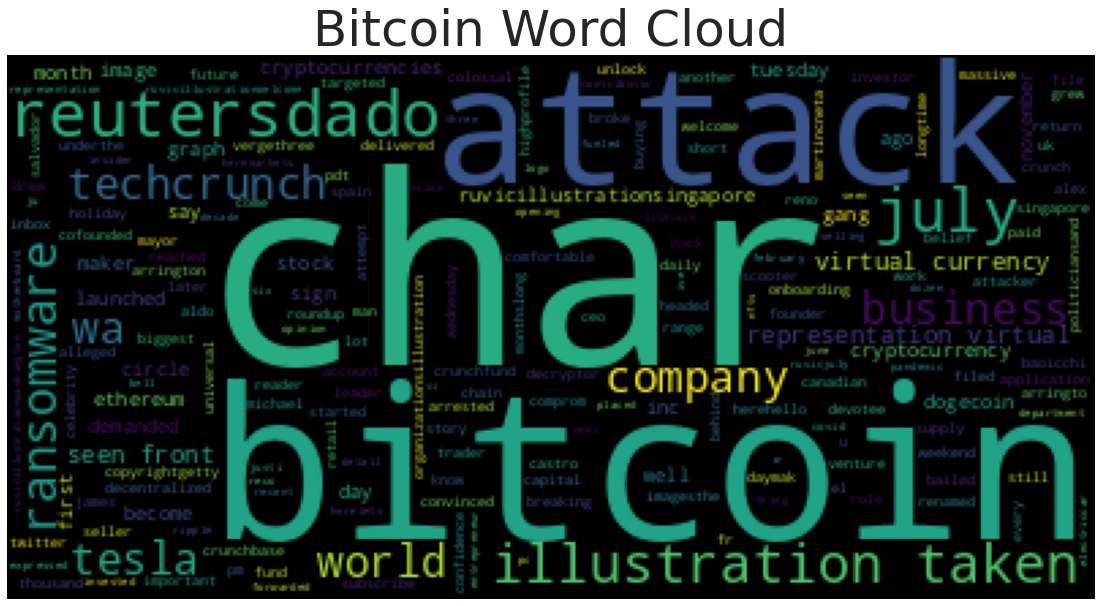

In [51]:
# Generated the Bitcoin word cloud

bitcoin_wc_str = ' '.join(bitcoin_processed)

bitcoin_wc = WordCloud().generate(bitcoin_wc_str)

plt.imshow(bitcoin_wc)

plt.axis("off")

plt.title("Bitcoin Word Cloud", fontsize = 50)

plt.show()

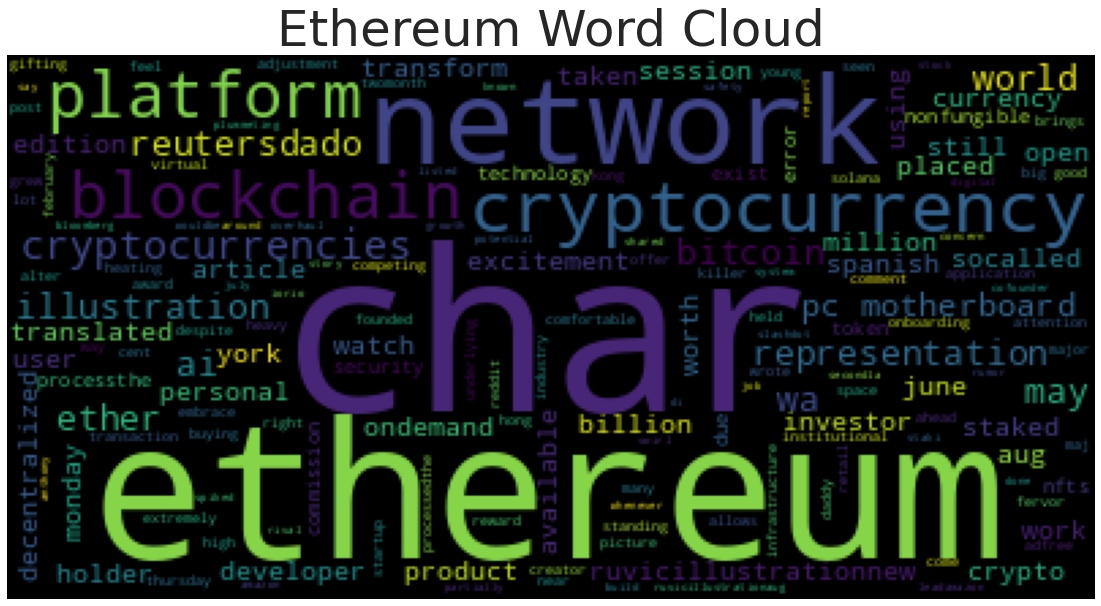

In [52]:
# Generated the Ethereum word cloud

ethereum_wc_str = ' '.join(ethereum_processed)

ethereum_wc = WordCloud().generate(ethereum_wc_str)

plt.imshow(ethereum_wc)

plt.axis("off")

plt.title("Ethereum Word Cloud", fontsize = 50)

plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [54]:
# Imported dependencies

import spacy

from spacy import displacy

In [56]:
# Loaded the spaCy model

nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [57]:
# Concatenated all of the Bitcoin text together

bitcoin_doc = ""
for i in range(0, len(bitcoin_df)):
    bitcoin_doc += str(bitcoin_df.text[i])

In [58]:
# Ran the NER processor on all of the text

bitcoin_ner = nlp(bitcoin_doc)

# Add a title to the document

bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [59]:
# Rendered the visualization

displacy.render(bitcoin_ner, style = 'ent')

In [60]:
# Listed all Entities

bitcoin_entities = [ent.text for ent in bitcoin_ner.ents]

bitcoin_entities

['Reno',
 'El Salvador',
 'Aldo Baoicchi',
 'Canadian',
 'Daymak',
 'Alex Castro',
 'The Verge',
 'Three days',
 'the holiday weekend',
 '$70m',
 '£50.5m',
 'every day',
 '3 p.m. PDT',
 'Daily Crunch',
 'July 23, 2021',
 'Bitcoin and Ethereum',
 '2021',
 'Michael Arrington',
 'TechCrunch',
 'Crunchbase',
 'CrunchFund',
 'Tuesday',
 '2017',
 'July 28',
 'Reuters',
 '40,000',
 'Wednesday',
 'chars]James Martin',
 'UK',
 'Spain',
 'Twitter',
 '2020',
 'the US Department of Justi',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'July 21',
 'Reuters',
 'Reuters',
 'FILE',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/Illustration\r\nSINGAPORE',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'Ju',
 'Dado Ruvic/Illustration\r\nWelcome',
 '10',
 'the Opening Bell',
 'first',
 'Entrepreneur',
 'first',
 'more than three decades ago',
 'six months ago',
 'dozens',
 'February 9, 2021',
 'REUTERS',
 'Dado',
 'Reuters',
 'Tesla Inc',
 '2020',
 'Kaseya',
 'Russian',
 'hundre

---

### Ethereum NER

In [62]:
# Concatenated all of the Ethereum text together

ethereum_doc = ""
for i in range(0, len(ethereum_df)):
    ethereum_doc += str(ethereum_df.text[i])

In [63]:
# Ran the NER processor on all of the text

ethereum_ner = nlp(ethereum_doc)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [65]:
# Rendered the visualization

displacy.render(ethereum_ner, style = 'ent')

In [64]:
# Listed all Entities

ethereum_entities = [ent.text for ent in ethereum_ner.ents]

ethereum_entities

['Ethereum',
 'Ethereum Killers',
 'Solana',
 'Bitcoin and Ethereum',
 '2021',
 '2017',
 'Reddit',
 'Ethereum',
 'Ethereum',
 'February 3, 2018',
 'REUTERS',
 'Dado Ruvic',
 'Aug 5',
 'Reuters',
 'Aug 5',
 'Reuters',
 'two-month',
 'Thursday',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationAug 3',
 'Reuters',
 'Ethereum',
 'Monday',
 'Amazon',
 'Amazon',
 'Di Iorio',
 'Ethereum',
 'Bloomberg',
 'Slashdot',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'July 30',
 'Reuters',
 'second',
 'more than $13 billion',
 '2.0',
 'Photothek',
 'more than $13 billion',
 '2.0',
 'Livepeer',
 '$20 million',
 'Ethereum',
 'Spanish',
 'AI',
 'Xoy Capital',
 'Guadalajara',
 'Jalisco',
 'Xoycoin',
 'Monday',
 'Chicago Bulls',
 'American Express',
 'Spanish',
 'AI',
 'The Securities and Exchange Commission',
 'London',
 'Ethereum',
 '12 965 000',
 'August 3-5, 2021',
 'Clie',
 'Hackaday',
 'Proof of Work',
 'Bitcoin, Ethereum',
 'Polygon',
 '$100 million']

---